# Generate test input for setup.m content.

In [17]:
import numpy as np
import csv as csv

In [19]:
def gen_M(s):
    M = []
    for i in range(s[2]):
        for j in range(s[1]):
            for k in range(s[0]):
                M.append([k,j,i])   
    return np.array(M)

In [21]:
def gen_N(M,s):
    N = []
    for row in M:
        n0 = row[0] - (s[0] if row[0]>s[0]/2. else 0)
        n1 = row[1] - (s[1] if row[1]>s[1]/2. else 0)
        n2 = row[2] - (s[2] if row[2]>s[2]/2. else 0)
        N.append([n0,n1,n2])

    return np.array(N)

In [25]:
def generate_r(M,s,R):
    S = np.diag(s)
    return np.inner(M,np.linalg.inv(S)*np.transpose(R))

In [76]:
generate_r(gen_M([1,2,3]),[1,2,3],np.array([[0.5,0.5,0.0],[0.5,0.0,0.5],[0.0,0.5,0.5]]))

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.16666666666666666], [0.0, 0.0, 0.16666666666666666], [0.0, 0.0, 0.3333333333333333], [0.0, 0.0, 0.3333333333333333]]


array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.16666667],
       [ 0.        ,  0.        ,  0.16666667],
       [ 0.        ,  0.        ,  0.33333333],
       [ 0.        ,  0.        ,  0.33333333]])

In [22]:
def generate_G(N,R):

    return 2 * np.pi * np.inner(N, np.linalg.inv(R))

In [37]:
def find_Gsqu(G):
    Gsqu = []
    for row in G:
        Gsqu.append(np.linalg.norm(row)**2)

    return np.array(Gsqu)

In [103]:
s = [3,3,3]
R = [[0.5,0.5,0.0],[0.5,0.0,0.5],[0.0,0.5,0.5]]
find_Gsqu(generate_G(gen_N(gen_M(s),s),R))

[0.0, 118.43525281307228, 118.43525281307228, 118.43525281307228, 157.91367041742973, 315.82734083485946, 118.43525281307228, 315.82734083485946, 157.91367041742973, 118.43525281307228, 157.91367041742973, 315.82734083485946, 157.91367041742973, 118.43525281307228, 434.26259364793174, 315.82734083485946, 434.26259364793174, 434.26259364793174, 118.43525281307228, 315.82734083485946, 157.91367041742973, 315.82734083485946, 434.26259364793174, 434.26259364793174, 157.91367041742973, 434.26259364793174, 118.43525281307228]


array([   0.        ,  118.43525281,  118.43525281,  118.43525281,
        157.91367042,  315.82734083,  118.43525281,  315.82734083,
        157.91367042,  118.43525281,  157.91367042,  315.82734083,
        157.91367042,  118.43525281,  434.26259365,  315.82734083,
        434.26259365,  434.26259365,  118.43525281,  315.82734083,
        157.91367042,  315.82734083,  434.26259365,  434.26259365,
        157.91367042,  434.26259365,  118.43525281])

# Verify setup.m subroutines graphically

In [4]:
from pydft import poisson
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [5]:
s = [6,6,4]
R = [[6,0,0],[0,6,0],[0,0,6]]
G = poisson._generate_G(R,s)
G2 = poisson._find_Gsqu(G)

In [7]:
print(G2)

[  0.           1.09662271   4.38649084   9.8696044    4.38649084
   1.09662271   1.09662271   2.19324542   5.48311356  10.96622711
   5.48311356   2.19324542   4.38649084   5.48311356   8.77298169
  14.25609525   8.77298169   5.48311356   9.8696044   10.96622711
  14.25609525  19.7392088   14.25609525  10.96622711   4.38649084
   5.48311356   8.77298169  14.25609525   8.77298169   5.48311356
   1.09662271   2.19324542   5.48311356  10.96622711   5.48311356
   2.19324542   1.09662271   2.19324542   5.48311356  10.96622711
   5.48311356   2.19324542   2.19324542   3.28986813   6.57973627
  12.06284982   6.57973627   3.28986813   5.48311356   6.57973627
   9.8696044   15.35271796   9.8696044    6.57973627  10.96622711
  12.06284982  15.35271796  20.83583151  15.35271796  12.06284982
   5.48311356   6.57973627   9.8696044   15.35271796   9.8696044
   6.57973627   2.19324542   3.28986813   6.57973627  12.06284982
   6.57973627   3.28986813   4.38649084   5.48311356   8.77298169
  14.256095

In [6]:
x0 = []
y0 = []
z0 =[]
x1 = []
y1 = []
z1 = []
x2 = []
y2 = []
z2 = []
for i in range(len(list(G))):
    row = G[i]
    if row[0] == 0:
        x0.append(row[1])
        y0.append(row[2])
        z0.append(G2[i])
    if row[1] == 0:
        x1.append(row[0])
        y1.append(row[2])
        z1.append(G2[i])
    if row[2] == 0:
        x2.append(row[0])
        y2.append(row[1])
        z2.append(G2[i])
    

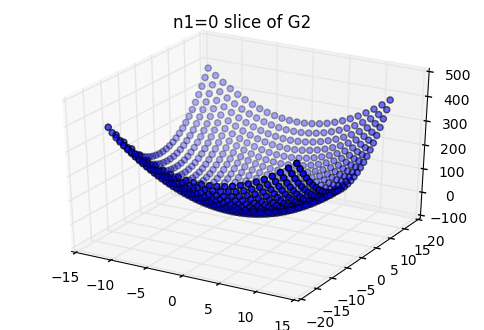

In [12]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x0,y0,z0)
plt.title("n1=0 slice of G2")
plt.show()

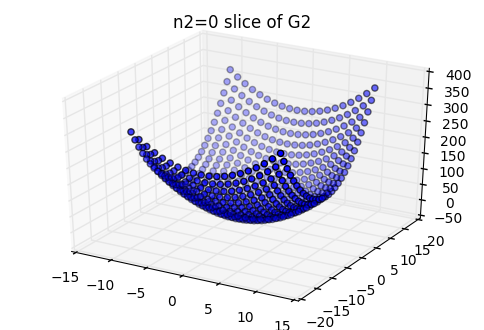

In [13]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1,y1,z1)
plt.title("n2=0 slice of G2")
plt.show()

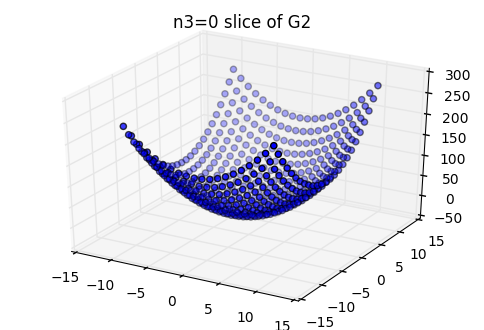

In [14]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x2,y2,z2)
plt.title("n3=0 slice of G2")
plt.show()

In [15]:
r = poisson._generate_r(R,s)
r0 = []
r1 = []
r2 = []
for row in r:
    r0.append(row[0])
    r1.append(row[1])
    r2.append(row[2])

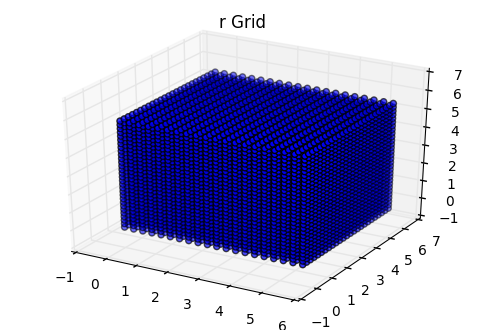

In [16]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(r0,r1,r2)
plt.title("r Grid")
plt.show()

I assume that the above is the correct behavior since it looks like we have a uniform distribution if points throughout our unit cell.

# Generate test data for section 3

In [38]:
def gen_dr(r,R):
    dr = []
    mid = sum(R)/2.
    for row in r:
        dv = row - mid
        dr.append(np.linalg.norm(dv))

    return np.array(dr)

In [29]:
s = [3,2,1]
R = [[0.5,0.5,-0.5],[0.5,-0.5,0.5],[-0.5,0.5,0.5]]
r = generate_r(gen_M(s),s,R)
dr = gen_dr(r,np.array(R))

[0.4330127018922193, 0.36324157862838946, 0.36324157862838946, 0.61237243569579447, 0.56519416526043897, 0.56519416526043897]


In [58]:
def gaussian(dr,sigma):
    #print(list(np.exp(-(dr**2)/(2*sigma**2))/(2*np.pi*sigma**2)**(3/2.)))
    return np.exp(-(dr**2)/(2*sigma**2))/(2*np.pi*sigma**2)**(3/2.)

In [49]:
s = [3,2,1]
R = [[1,0,0,],[0,1,0],[0,0,1]]
r = generate_r(gen_M(s),s,R)
dr = gen_dr(r,np.array(R))
gaussian(dr,0.25)

[0.010072639249693521, 0.059596720089735565, 0.059596720089735565, 0.074427296480276031, 0.44036350805532332, 0.44036350805532332]


array([ 0.01007264,  0.05959672,  0.05959672,  0.0744273 ,  0.44036351,
        0.44036351])

In [41]:
s = [20,25,30]
R = [[6,0,0],[0,6,0],[0,0,6]]
r = generate_r(gen_M(s),s,R)
dr = gen_dr(r,np.array(R))
sum(gaussian(dr,0.5)*np.linalg.det(R)/(20.*25.*30.))

0.99999999009687557

In [68]:
def charge_dist(r,R,cs,sigs):
    n = np.zeros(len(r))
    dr = gen_dr(r,np.array(R))
    print("dr",dr)
    for i in range(len(cs)):
        n += cs[i]*gaussian(dr,sigs[i])
        
    print('h',list(n))
    return np.array(n)

In [69]:
s = [2,2,2]
R = [[1,0,0],[0,1,0],[0,0,1]]
r = generate_r(gen_M(s),s,R)
cs = [0.5,0.025,0.3]
sigs = [1,-1,0.5]
n = charge_dist(r,R,cs,sigs)

('dr', array([ 0.8660254 ,  0.70710678,  0.70710678,  0.5       ,  0.70710678,
        0.5       ,  0.5       ,  0.        ]))
('h', [0.056911838376348944, 0.08201987696049548, 0.08201987696049548, 0.12184330048684332, 0.08201987696049548, 0.12184330048684332, 0.12184330048684332, 0.18571888510765483])


In [60]:
s = [20,25,30]
R = [[6,0,0],[0,6,0],[0,0,6]]
r = generate_r(gen_M(s),s,R)
cs = [1,-1]
sigs = [0.75,0.25]
n = charge_dist(r,R,cs,sigs)
sum(n*np.linalg.det(R)/float(np.prod(s)))

-0.00022122006183345416

# Graphical check of code.

In [28]:
from pydft.poisson import charge_dist
from pydft import poisson
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [38]:
R = [[6,0,0],[0,6,0],[0,0,6]]
s = [20,25,30]
coefs = [-1,1]
sigmas = [0.75,0.5]
r = poisson._generate_r(R,s)
n = charge_dist(s,R,coefs,sigmas)

In [39]:
x0 = []
y0 = []
z0 =[]
x1 = []
y1 = []
z1 = []
x2 = []
y2 = []
z2 = []
for i in range(len(r)):
    row = r[i]
    if np.allclose([row[0]],[3.],atol=1E-3):
        x0.append(row[1])
        y0.append(row[2])
        z0.append(n[i])
    if np.allclose([row[1]],[3.12],atol=1E-3):
        x1.append(row[0])
        y1.append(row[2])
        z1.append(n[i])
    if np.allclose([row[2]],[3.],atol=1E-3):
        x2.append(row[0])
        y2.append(row[1])
        z2.append(n[i])


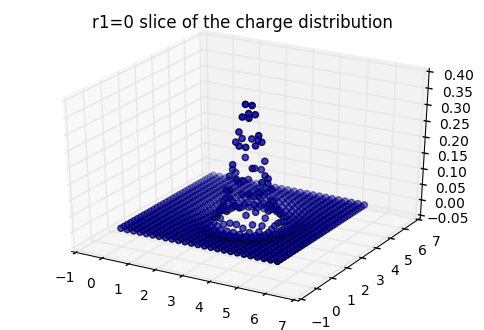

In [40]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x0,y0,z0)
plt.title("r1=0 slice of the charge distribution")
plt.show()

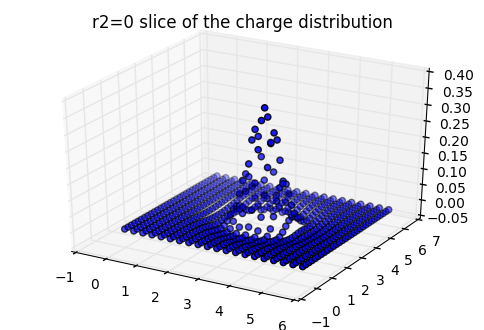

In [41]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1,y1,z1)
plt.title("r2=0 slice of the charge distribution")
plt.show()

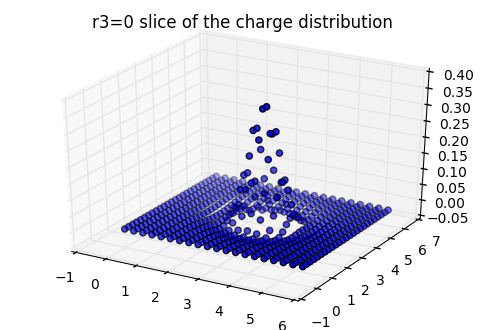

In [42]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x2,y2,z2)
plt.title("r3=0 slice of the charge distribution")
plt.show()

# Test L

In [1]:
from pydft import poisson
import numpy as np

In [2]:
R = [[6,0,0],[0,6,0],[0,0,6]]
s = [6,6,4]
t = np.random.normal(0,0.1,np.prod(s))
L = poisson._L_operator(s,R,t)
print(L[0])

0.0


In [3]:
Linv = poisson._Linv_operator(s,R,t)
    

[[-0.         -0.         -0.         ..., -0.         -0.         -0.        ]
 [-0.         -0.00422172 -0.         ..., -0.         -0.         -0.        ]
 [-0.         -0.         -0.00105543 ..., -0.         -0.         -0.        ]
 ..., 
 [-0.         -0.         -0.         ..., -0.00038379 -0.         -0.        ]
 [-0.         -0.         -0.         ..., -0.         -0.00070362 -0.        ]
 [-0.         -0.         -0.         ..., -0.         -0.         -0.00140724]]
[-0.         -0.00422172 -0.00105543 -0.00046908 -0.00105543 -0.00422172
 -0.00422172 -0.00211086 -0.00084434 -0.00042217 -0.00084434 -0.00211086
 -0.00105543 -0.00084434 -0.00052771 -0.00032475 -0.00052771 -0.00084434
 -0.00046908 -0.00042217 -0.00032475 -0.00023454 -0.00032475 -0.00042217
 -0.00105543 -0.00084434 -0.00052771 -0.00032475 -0.00052771 -0.00084434
 -0.00422172 -0.00211086 -0.00084434 -0.00042217 -0.00084434 -0.00211086
 -0.00422172 -0.00211086 -0.00084434 -0.00042217 -0.00084434 -0.00211086
 

In [6]:
out=poisson._L_operator(s,R,poisson._Linv_operator(s,R,t))

In [5]:
t

array([-0.08090704,  0.06812825,  0.02846625,  0.05933232])

In [6]:
out

array([ 0.        ,  0.06812825,  0.02846625,  0.05933232])

In [7]:
n = poisson._generate_N(s)
m = np.transpose(poisson._generate_M(s))

In [3]:
poisson._B_operator(s,R,t)

('sg', (4, 3))
('sr', (4, 3))


array([-0.03509332 +0.00000000e+00j,  0.05879784 -5.74917537e-18j,
        0.22134153 -1.57021058e-17j,  0.02906951 +1.35936002e-17j])

In [4]:
out = poisson._Bj_operator(s,R,poisson._B_operator(s,R,t))

('sg', (4, 3))
('sr', (4, 3))
('B', (4, 4))
('Bj', array([[ 0.25 -0.00000000e+00j,  0.25 -0.00000000e+00j,
         0.25 -0.00000000e+00j,  0.25 -0.00000000e+00j],
       [ 0.25 -0.00000000e+00j, -0.25 -3.06161700e-17j,
         0.25 -0.00000000e+00j, -0.25 -3.06161700e-17j],
       [ 0.25 -0.00000000e+00j,  0.25 -0.00000000e+00j,
        -0.25 -3.06161700e-17j, -0.25 -3.06161700e-17j],
       [ 0.25 -0.00000000e+00j, -0.25 -3.06161700e-17j,
        -0.25 -3.06161700e-17j,  0.25 +6.12323400e-17j]]))
('B.Bj', array([[ 1. +0.00000000e+00j,  0. -6.12323400e-17j,  0. -6.12323400e-17j,
         0. +0.00000000e+00j],
       [ 0. +6.12323400e-17j,  1. +0.00000000e+00j,  0. +0.00000000e+00j,
         0. -6.12323400e-17j],
       [ 0. +6.12323400e-17j,  0. +0.00000000e+00j,  1. +0.00000000e+00j,
         0. -6.12323400e-17j],
       [ 0. +0.00000000e+00j,  0. +6.12323400e-17j,  0. +6.12323400e-17j,
         1. +0.00000000e+00j]]))
('diag', array([ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j]))


In [5]:
out

array([ 0.06852889 -1.96442024e-18j,  0.02459521 -8.57679439e-18j,
       -0.05667663 -8.57679439e-18j, -0.07154079 +1.96442024e-18j])

In [6]:
t

array([ 0.06852889,  0.02459521, -0.05667663, -0.07154079])

In [2]:
temp = np.array([[.8+.7j,1.2-.2j],[-.5-.2j,1.2+.2j]])

In [9]:
tempj = np.transpose(temp.conjugate())

In [10]:
np.dot(temp,tempj)

array([[ 2.61+0.j  ,  0.86-0.67j],
       [ 0.86+0.67j,  1.77+0.j  ]])

# Graphical check of code.

In [1]:
from pydft.poisson import charge_dist
from pydft import poisson
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
R = [[6,0,0],[0,6,0],[0,0,6]]
s = [20,25,30]
coefs = [-1,1]
sigmas = [0.75,0.5]
#r = poisson._generate_r(R,s)
n = charge_dist(s,R,coefs,sigmas)
print("n")
phi = poisson.poisson(s,R,n)
print("phi")
phi = np.real(phi)
print("phir")

n
phi
phir


In [33]:
x0 = []
y0 = []
z0 =[]
x1 = []
y1 = []
z1 = []
x2 = []
y2 = []
z2 = []
for i in range(len(r)):
    row = r[i]
    if np.allclose([row[0]],[3.],atol=1E-3):
        x0.append(row[1])
        y0.append(row[2])
        z0.append(phi[i])
    if np.allclose([row[1]],[3.12],atol=1E-3):
        x1.append(row[0])
        y1.append(row[2])
        z1.append(phi[i])
    if np.allclose([row[2]],[3.12],atol=1E-3):
        x2.append(row[0])
        y2.append(row[1])
        z2.append(phi[i])

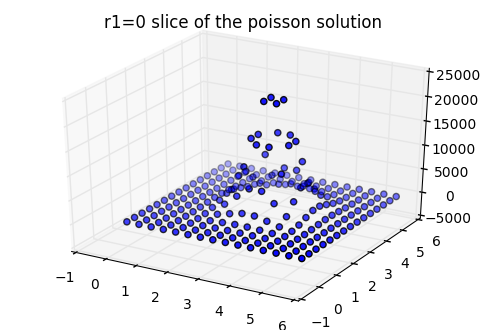

In [34]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x0,y0,z0)
plt.title("r1=0 slice of the poisson solution")
plt.show()

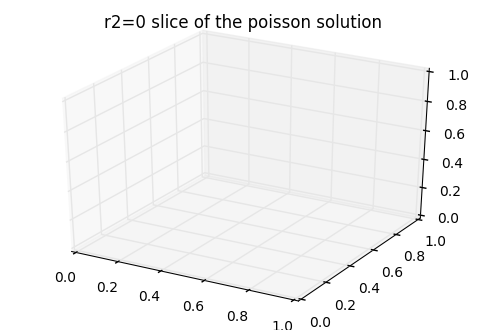

In [35]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1,y1,z1)
plt.title("r2=0 slice of the poisson solution")
plt.show()

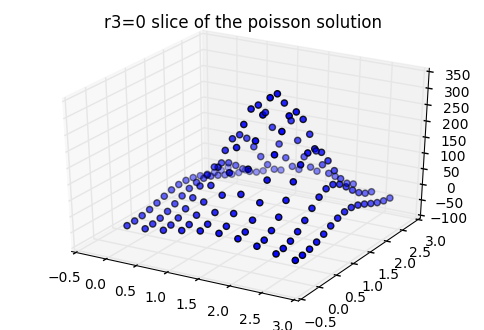

In [16]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x2,y2,z2)
plt.title("r3=0 slice of the poisson solution")
plt.show()

In [3]:
Unum=0.5*np.real(np.dot(poisson._Bj_operator(s,R,phi),np.transpose(poisson._O_operator(s,R,poisson._Bj_operator(s,R,n)))))
Uanal=((1/sigmas[0]+1/sigmas[1])/2-np.sqrt(2)/np.sqrt(sigmas[0]**2+sigmas[1]**2))/np.sqrt(np.pi);

In [4]:
print("C",Unum,"A",Uanal)

('C', 0.055140543755668854, 'A', 0.055142527694733337)


In [32]:
poisson._B_operator(s,R,n)

array([  4.08902990e-03 +0.00000000e+00j,
        -2.14596945e+00 +1.56239587e-16j,
         4.48193383e+00 -3.07866192e-15j, ...,
        -2.93308148e+00 -5.10876064e-15j,
         4.40942154e+00 +5.22498711e-15j,  -4.16049059e+00 -2.56739074e-15j])

In [10]:
np.fft.fftn(np.transpose(n.reshape(s,order="F"))).reshape(np.prod(s),order="F")

array([  4.08902990e-03 +0.00000000e+00j,
        -2.14596945e+00 +8.88178420e-16j,
         4.48193383e+00 -3.24740235e-15j, ...,
        -2.93308148e+00 +1.13751265e-14j,
         4.40942154e+00 -1.75294734e-14j,  -4.16049059e+00 +2.11050417e-14j])

In [42]:
R = [[6,0,0],[0,6,0],[0,0,6]]
s = [2,5,5]
v = np.random.normal(0.1,0.5,np.prod(s))
out = poisson._O_operator(s,R,v)

In [44]:
out/v

array([ 216.,  216.,  216.,  216.,  216.,  216.,  216.,  216.,  216.,
        216.,  216.,  216.,  216.,  216.,  216.,  216.,  216.,  216.,
        216.,  216.,  216.,  216.,  216.,  216.,  216.,  216.,  216.,
        216.,  216.,  216.,  216.,  216.,  216.,  216.,  216.,  216.,
        216.,  216.,  216.,  216.,  216.,  216.,  216.,  216.,  216.,
        216.,  216.,  216.,  216.,  216.])

In [45]:
np.linalg.det(R)

216.00000000000006

In [46]:
out = poisson._L_operator(s,R,v)

In [56]:
def Linv(s,R,v):
        G = poisson._generate_G(R,s)
        G2 = poisson._find_Gsqu(G)
        G2[0] = 1.0
        Linv = -np.diag(1/(G2*np.linalg.det(R)))
        Linv[0][0] = -0.0
        print("Linv[1]",Linv[1])
        
        return np.dot(Linv,v)


In [57]:
Linv(s,R,out)

('Linv[1]', array([-0.        , -0.00422172, -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ]))


array([ 0.        ,  0.11832629,  0.47909077,  0.45351018, -0.25418415,
        0.21810589, -0.10641626, -0.73686439, -0.32264945,  0.05025305,
        0.69602715, -0.03545677,  0.22833835,  0.34929912, -0.07085052,
       -0.30396413, -0.16093394,  0.77227284, -0.07733247, -0.06687327,
       -0.73173773, -0.2947343 , -0.08316883,  0.19715205,  0.50113078,
        0.13452637,  1.15602068,  0.88739874, -1.24630461, -0.72717014,
       -1.31412489,  0.90140608,  0.53977518,  0.14722332,  0.36410301,
       -0.10356335,  0.37534542,  0.27466015,  0.5458047 , -0.04444319,
        0.12686193,  0.2718821 ,  0.28111079,  0.81577042,  0.47393198,
       -0.04463735, -0.31841144, -0.31668544,  0.06293889,  0.05174014])

In [58]:
v

array([-0.32292136,  0.11832629,  0.47909077,  0.45351018, -0.25418415,
        0.21810589, -0.10641626, -0.73686439, -0.32264945,  0.05025305,
        0.69602715, -0.03545677,  0.22833835,  0.34929912, -0.07085052,
       -0.30396413, -0.16093394,  0.77227284, -0.07733247, -0.06687327,
       -0.73173773, -0.2947343 , -0.08316883,  0.19715205,  0.50113078,
        0.13452637,  1.15602068,  0.88739874, -1.24630461, -0.72717014,
       -1.31412489,  0.90140608,  0.53977518,  0.14722332,  0.36410301,
       -0.10356335,  0.37534542,  0.27466015,  0.5458047 , -0.04444319,
        0.12686193,  0.2718821 ,  0.28111079,  0.81577042,  0.47393198,
       -0.04463735, -0.31841144, -0.31668544,  0.06293889,  0.05174014])